# Estatística descritiva univariada

### Transformação de variáveis quantitativas em qualitativas



Conforme descrito no início deste módulo, as variáveis quantitativas contínuas são aquelas cujos possíveis valores pertencem a um intervalo de números reais. Desta forma, não faz sentido calcular a frequência para cada valor possível, já que eles raramente se repetem. 

Neste contexto, faz sentido agrupar os dados em classes ou faixas. O intervalo a ser definido entre as classes é arbitrário. Porém, se o número de classes for muito pequeno, informações são perdidas; enquanto que, se o número de classes for muito grande, o resumo das informações fica prejudicado. 

O intervalo entre as classes não precisaria ser constante, mas por uma questão de simplicidade e facilidade de interpretação, é costume adotar um intervalo constante.


Para ilustrar, usaremos a seguinte base de dados, com as notas finais de 30 alunos em uma disciplina de estatística de uma universidade.

In [2]:
import pandas as pd
import numpy as np

DADOS = "../../base_de_dados/grades.csv"

df_notas = pd.read_csv(DADOS)

df_notas.head()

,grades
0,4.2
1,3.9
2,5.7
3,6.5
4,4.6


- verificando se há repetição de notas
- Nesse cenário é melhor contar os intervalos e não repetições

In [3]:
df_notas.tail()

,grades
25,5.0
26,6.6
27,7.1
28,5.3
29,4.7


In [11]:
df_notas.describe()

,grades
count,30.000000
mean,5.686667
std,1.318498
min,3.500000
25%,4.700000
50%,5.500000
75%,6.575000
max,8.800000


verificando ocorrencias de notas e percebendo que a tabela de frequência não é aplicável nesse caso e sim a sepação de distribuição


In [4]:
# problemas com valores contínuos
df_notas["grades"].value_counts()

grades
5.0    4
5.5    2
6.0    2
7.2    2
4.7    2
3.9    1
4.2    1
8.0    1
6.3    1
4.6    1
6.5    1
5.7    1
4.4    1
6.4    1
4.5    1
6.8    1
3.5    1
7.4    1
8.8    1
3.8    1
6.6    1
7.1    1
5.3    1
Name: count, dtype: int64

Agrupando os valores da coluna "grades" em 10 intervalos com: value_counts(bins=10) e contando quantos valores pertencem a cada um desses intervalos

In [5]:
#Divide os valores da coluna em 10 intervalos de tamanho igual.

#Conta quantos valores caem dentro de cada intervalo.
#(4.56, 5.09]     7 - no intervao de (4.56, 5.09] temos 7 contagens

df_notas["grades"].value_counts(bins=10)

(4.56, 5.09]     7
(6.15, 6.68]     4
(6.68, 7.21]     4
(3.494, 4.03]    3
(4.03, 4.56]     3
(5.09, 5.62]     3
(5.62, 6.15]     3
(7.21, 7.74]     1
(7.74, 8.27]     1
(8.27, 8.8]      1
Name: count, dtype: int64

botando em ordem

In [6]:
df_notas["grades"].value_counts(bins=10).sort_index()

(3.494, 4.03]    3
(4.03, 4.56]     3
(4.56, 5.09]     7
(5.09, 5.62]     3
(5.62, 6.15]     3
(6.15, 6.68]     4
(6.68, 7.21]     4
(7.21, 7.74]     1
(7.74, 8.27]     1
(8.27, 8.8]      1
Name: count, dtype: int64

Visualizando em histograma

<Axes: ylabel='Frequency'>

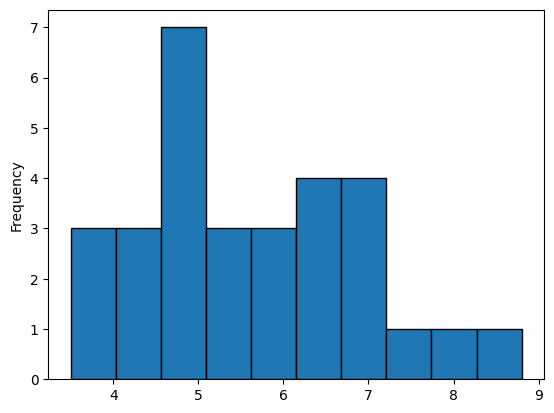

In [7]:
df_notas["grades"].plot.hist(bins=10, edgecolor="black")

In [8]:
#Divide os valores da coluna em 5 intervalos de tamanho igual.


df_notas["grades"].value_counts(bins=5).sort_index()

(3.494, 4.56]     6
(4.56, 5.62]     10
(5.62, 6.68]      7
(6.68, 7.74]      5
(7.74, 8.8]       2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

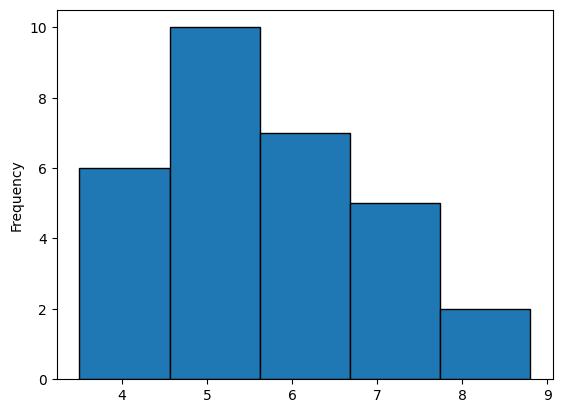

In [9]:
df_notas["grades"].plot.hist(bins=5, edgecolor="black")

Mas qual será a melhor divisão de classes para representar os dados de forma clara e objetiva? A escolha do número de classes e dos intervalos de classe é uma etapa crucial na construção de tabelas de distribuição de frequências e na representação gráfica dos dados.

A regra de Sturges é uma regra empírica utilizada para determinar o número de classes em uma distribuição de frequências. A regra é dada pela fórmula:

$$
k = 1 + \log_{2}(n)
$$

onde *k* é o número de classes e *n* é o número de observações.

In [11]:
#verficiando qtde de linhas e colunas
df_notas.shape

(30, 1)

Aplicando a regra de Sturges no dataframe

In [12]:
k = 1 + np.log2(df_notas.shape[0])

k

np.float64(5.906890595608519)

arredondando para cima com ceil

In [14]:
k = np.ceil(k)
k

np.float64(6.0)

Verificando amplitude = intervalo max e min dividido pelo numero de intervalos

In [ ]:
#Cada nota terá um intervalo de 0.8833333333333334

amplitude = (df_notas["grades"].max() - (df_notas["grades"]).min()) / k
amplitude

np.float64(0.8833333333333334)

- distribuição das notas da coluna "grades" do DataFrame df_notas, agrupando os valores em k intervalos (bins) e contando quantos valores caem dentro de cada um.
- transformando k(float) em inteiro

In [17]:
df_notas["grades"].value_counts(bins=int(k))

(4.383, 5.267]    9
(5.267, 6.15]     6
(6.15, 7.033]     5
(3.494, 4.383]    4
(7.033, 7.917]    4
(7.917, 8.8]      2
Name: count, dtype: int64

Plotando histograma

<Axes: ylabel='Frequency'>

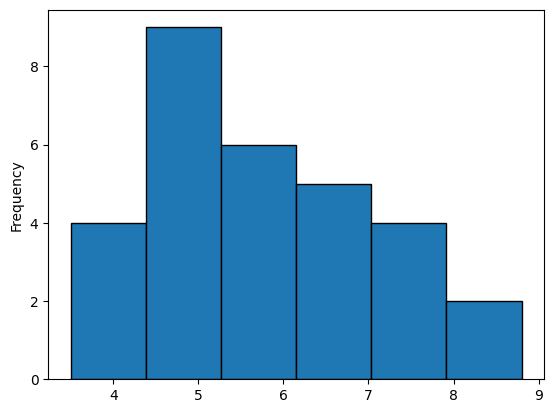

In [18]:
df_notas["grades"].plot.hist(bins=int(k), edgecolor="black")